# Tutorial 3 - Plotting

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator

import simple
simple.set_logging_level('INFO')

models = simple.load_collection('data/CCSNe_FeNi.hdf5')

Loading existing file: data/CCSNe_FeNi.hdf5
Loading file: data/CCSNe_FeNi.hdf5
Loading model: Ri18_m15 (CCSNe)
Loading model: iniab2.0E-02GN93 (IsoRef)
Loading model: W17 (IsoRef)
Loading model: Ri18_m20 (CCSNe)
Loading model: Ri18_m25 (CCSNe)
Loading model: Pi16_m15 (CCSNe)
Loading model: iniab2.0E-02GN93_Lo03 (IsoRef)
Loading model: Pi16_m20 (CCSNe)
Loading model: Pi16_m25 (CCSNe)
Loading model: La22_m15 (CCSNe)
Loading model: La22_m20 (CCSNe)
Loading model: La22_m25 (CCSNe)
Loading model: Si18_m15 (CCSNe)
Loading model: iniab1.3E-02Lo03_Lo03_merged (IsoRef)
Loading model: Si18_m20 (CCSNe)
Loading model: Si18_m25 (CCSNe)
Loading model: Ra02_m15 (CCSNe)
Loading model: rau_solar_ref (IsoRef)
Loading model: Ra02_m20 (CCSNe)
Loading model: Ra02_m25 (CCSNe)
Loading model: LC18_m15 (CCSNe)
Loading model: iniab1.3E-02As09_As09_merged (IsoRef)
Loading model: LC18_m20 (CCSNe)
Loading model: LC18_m25 (CCSNe)
Time to load file: 0:00:00.272919


## Customising labels
Informative labels are autogenerated by the plotting functions. By default, information that is common to all data points is included in the axis labels to keep the data point labels short. Information that can be contained in the labels are: name of the attribute, or its label if one has been defined, the isotope or ratio key, the unit of the data, and finally the model name. The inclusion of these can be modified using the appropriate argument, see the [``get_data()``]() function for more details. 

By default, the attribute name is included in the label only if is different than the one defined by the ``default_attrname`` or the attribute name is defined in the key.

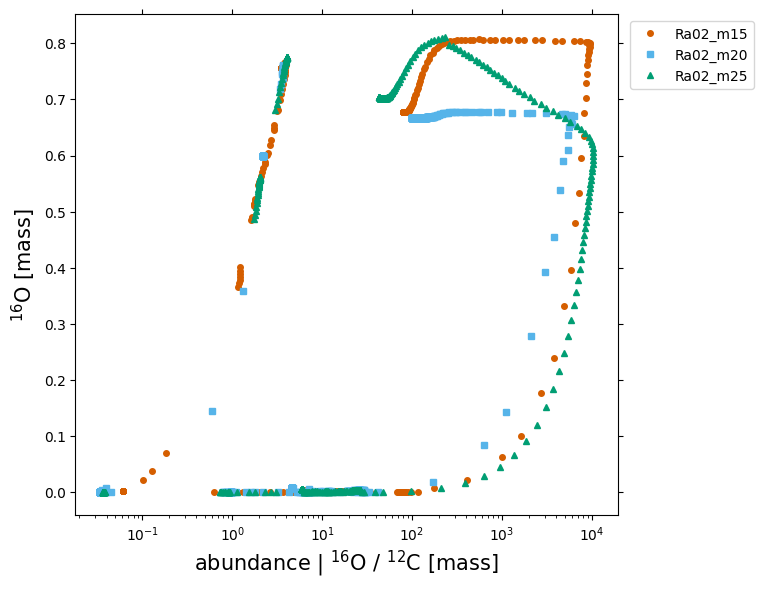

In [2]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02', 
            ax_xscale='log', default_attrname='abundance');

To change the label behaviour you can give either a single argument that is used for all axis or you can supply a list containing one value per axis. It is also possible to specify the value for a single axis by prefixing the argument name with the name of the axis, e.g. ``xunit_in_label``. This will override any argument passed to the generic argument for this axis.



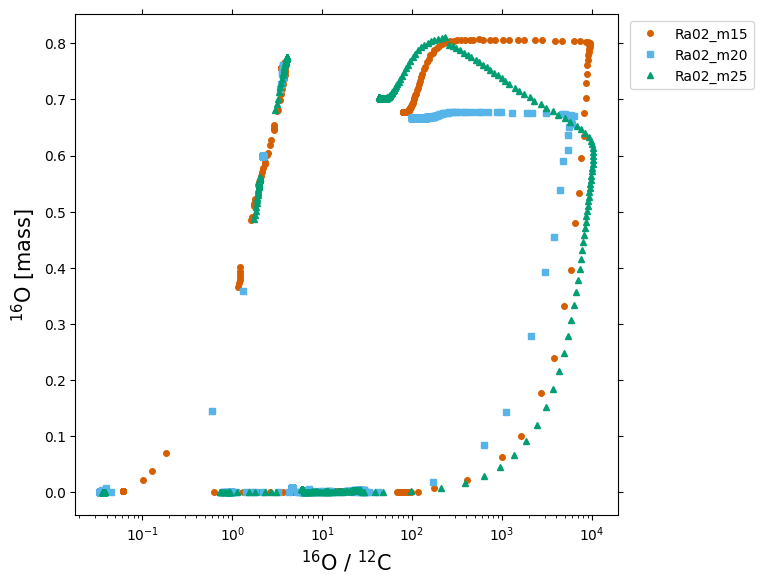

In [3]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02', 
            ax_xscale='log', attrname_in_label=False, xunit_in_label=False);

You can provide your own labels to the datapoints by giving a list to the ``label`` argument. Similarly, you can define the axis labels by prefixing the label argument by the axis name as in the example below.

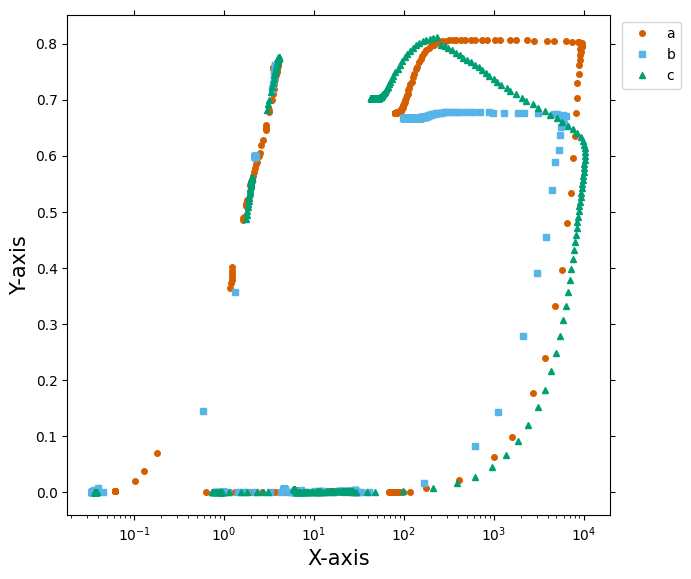

In [4]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02', 
            ax_xscale='log', label=['a', 'b', 'c'], xlabel='X-axis', ylabel='Y-axis');

## Styling Plots
The SIMPLE plotting functions allow you to update the ``axes`` or ``figure`` object using keyword arguments. To update the ``axes`` object pass the name of the method, minus the ``set_`` part, with the prefix ``ax_`` equal to the desired value, e.g. ``ax_ylim=(1,2)``. You can do the same for ``axes.xaxis`` and ``axis.yaxis`` methods using the prefix ``xax_`` and ``yax_``. To update the figure object use the prefix ``fig_``. 

You can pass multiple arguments to the methods by passing a tuple or a dictionary which will be unpacked when the method is called. You can also define keyword arguments separately using the ``ax_kw_<method>_<keyword>`` prefix. Note however that the method is only called is the ``ax_<method>`` argument is also present. Setting the ``ax_<method>`` to ``False`` will not call the function while setting it to ``True`` will call the method with no arguments, unless keyword arguments are specified as described above. To pass a boolean value to a method simple place it within a tuple, e.g. ``(True, )``. 

If you want to reuse the same style arguments repeatedly you can place them in a dictionary and unpack it when needed.



Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


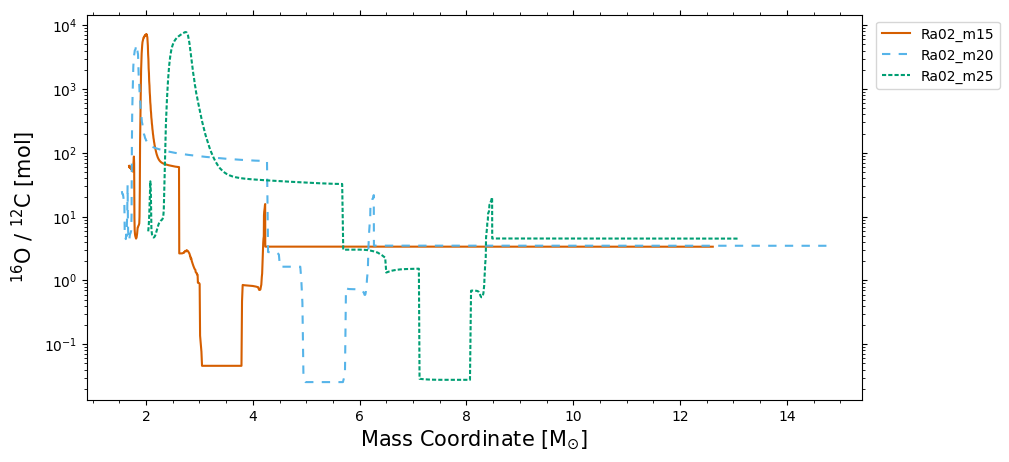

In [5]:
abundance_kwargs = {'ax_tick_params': dict(left=True,right=True,top=True,labelleft=True,which='both'),
                    'xax_minor_locator': AutoMinorLocator(), 
                    'yax_major_locator': LogLocator(subs=(1.0, ),numticks=999),
                    'yax_minor_locator': LogLocator(numticks=999, subs='auto'),
                    'ax_yscale': 'log'}

simple.plot_ccsne.abundance(models, 'o16/c12', where='.dataset==Ra02', unit='mol',
                            **abundance_kwargs);

In [6]:
slope_kwargs = {'ax_tick_params': dict(left=True,right=True,top=True,labelleft=True,which='both'),
                'xax_minor_locator': AutoMinorLocator(), 
                'yax_minor_locator': AutoMinorLocator()}

## Updating the Default Style
The default style of the plots is set by the ``default_kwargs`` dictionary attached to each function. The ccsne plotting functions inherits the style of the generic plotting functions unless they are respecified. Similarly, shortcuts will inherit the style of the plotting function they are attached to.

In [7]:
simple.plot.default_kwargs

{'linestyle': False,
 'color': True,
 'marker': True,
 'fixed_model_linestyle': None,
 'fixed_model_color': None,
 'fixed_model_marker': None,
 'ax_kw_xlabel_fontsize': 15,
 'ax_kw_ylabel_fontsize': 15,
 'markersize': 4,
 'legend_outside': True,
 'ax_tick_params': {'axis': 'both', 'left': True, 'right': True, 'top': True},
 'fig_size': (7, 6.5)}

In [8]:
simple.plot_ccsne.default_kwargs

{'linestyle': True, 'color': True, 'marker': False, 'fig_size': (10, 5)}

In [9]:
simple.plot_ccsne.abundance.default_kwargs

{'default_attrname': 'abundance', 'unit': 'mass'}

You can update the default style by updating the ``default_kwargs`` dictionary. 

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


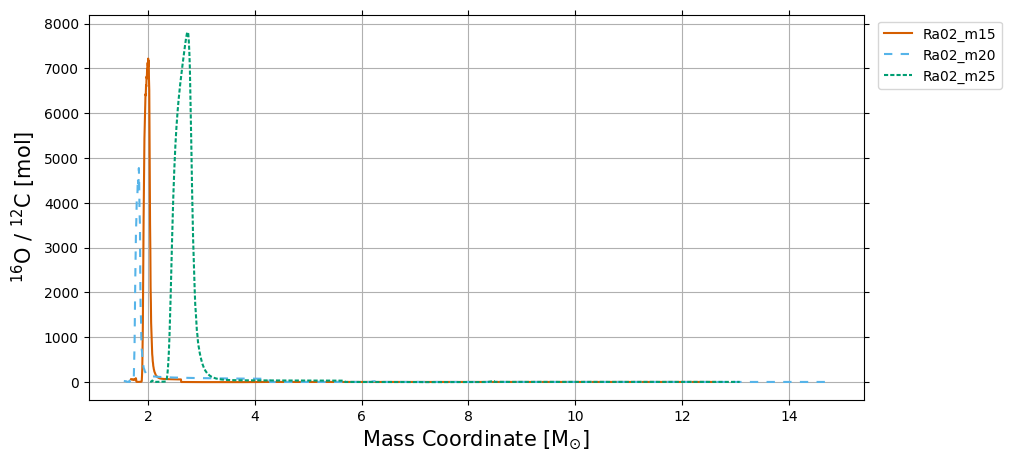

In [10]:
simple.plot.default_kwargs['ax_tick_params'] = dict(left=True,right=True,top=True,labelleft=True,which='both')
simple.plot.default_kwargs['ax_grid'] = (True,)

simple.plot_ccsne.abundance(models, 'o16/c12', where='.dataset==Ra02', unit='mol');

## Shortcuts
Shortcuts are a convenient way to predefine a set of arguments for a plotting function. For example the ``intnorm`` and ``stdnorm`` shortcut sets the ``default_attrname`` to the path of the result from these normalisations. Using these shortcuts means you only have to specify the isotope or ratio you want to plot.

You can create your own shortcuts using the ``add_shortcut`` function attached to anything with a ``default_kwargs`` object.

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


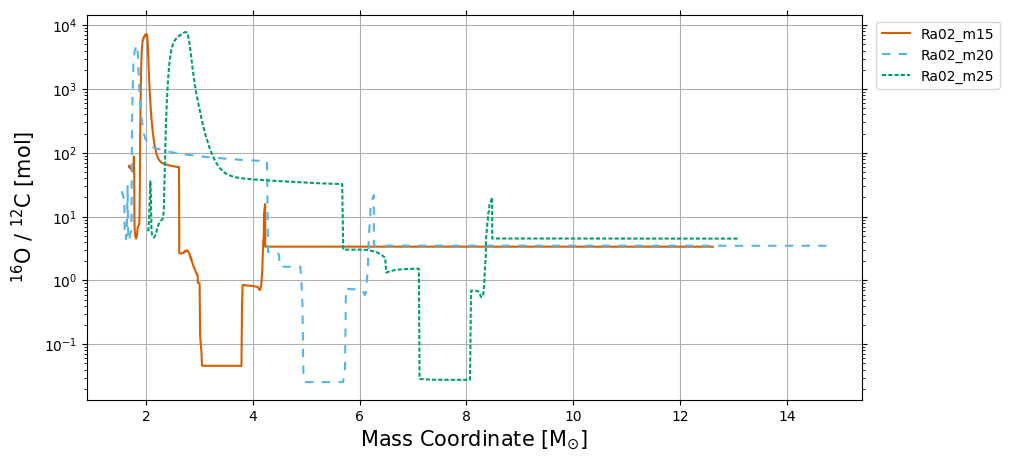

In [11]:
simple.plot_ccsne.add_shortcut('abulogy', ax_yscale='log', default_attrname='abundance')
simple.plot_ccsne.abulogy(models, 'o16/c12', where='.dataset==Ra02', unit='mol');

## Creating Custom Plots
The ``get_data`` function allows you to extract data to create your own plotting functions.

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


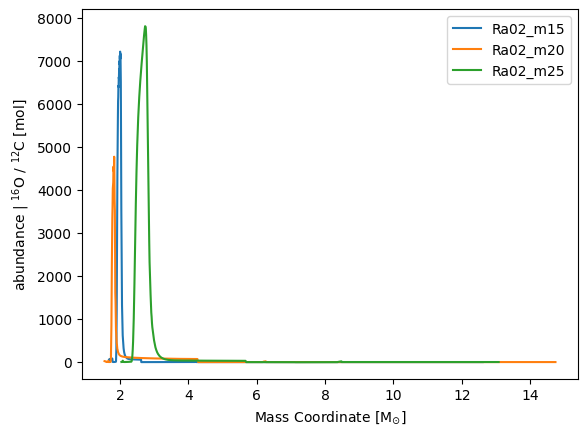

In [12]:
model_datapoints, axis_labels = simple.get_data(models, 'x, y', xkey='.masscoord', ykey='.abundance[o16/c12]', 
                                                where='.dataset==Ra02', yunit='mol')

# Set the axis labels
plt.xlabel(axis_labels['x'])
plt.ylabel(axis_labels['y'])

# Iterate though the data and plot it
for model_name, datapoints in model_datapoints.items():
    for dp in datapoints:
        plt.plot(dp['x'], dp['y'], label=dp['label'])
        
plt.legend();